In [1]:
import numpy as np 
import pandas as pd
import random
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

## importing dataset

In [2]:
df=pd.read_csv("Downloads/fraud_data.csv")

In [3]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 195.5+ MB


In [5]:
df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+04,59054.000000,5.905400e+04,59054.000000,59054.000000,58139.000000,58896.000000,58610.000000,52326.000000,52326.000000,...,14061.00000,4511.000000,14059.000000,14054.000000,525.000000,525.000000,487.000000,524.000000,525.000000,7715.000000
mean,3.282166e+06,0.033952,7.368220e+06,134.142888,9910.366360,362.438054,153.264551,199.104231,290.653939,86.806616,...,189.89958,14.238750,351.767622,404.594777,385.257143,15.748571,12.739220,326.225191,148.794286,26.499028
std,1.702573e+05,0.181107,4.612063e+06,233.112295,4893.704524,157.360648,11.395609,41.296438,101.796538,2.639572,...,30.34787,1.524658,141.600677,152.201538,213.565534,6.496154,2.275238,97.662855,31.168092,3.739140
min,2.987019e+06,0.000000,8.673000e+04,0.292000,1008.000000,100.000000,100.000000,100.000000,100.000000,13.000000,...,100.00000,11.000000,100.000000,100.000000,114.000000,14.000000,11.000000,100.000000,100.000000,0.000000
25%,3.135748e+06,0.000000,3.074217e+06,42.950000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,...,166.00000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282062e+06,0.000000,7.288450e+06,68.017000,9749.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.00000,15.000000,339.000000,484.000000,252.000000,14.000000,11.000000,321.000000,147.000000,24.000000
75%,3.429699e+06,0.000000,1.123918e+07,117.000000,14223.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.00000,15.000000,427.000000,533.000000,554.000000,14.000000,15.000000,361.000000,169.000000,32.000000
max,3.577536e+06,1.000000,1.581105e+07,5279.950000,18390.000000,600.000000,229.000000,237.000000,536.000000,102.000000,...,225.00000,29.000000,670.000000,660.000000,854.000000,43.000000,24.000000,548.000000,216.000000,32.000000


In [6]:
df.isFraud.value_counts()

0    57049
1     2005
Name: isFraud, dtype: int64

In [7]:
df.isFraud.value_counts(normalize=True)

0    0.966048
1    0.033952
Name: isFraud, dtype: float64

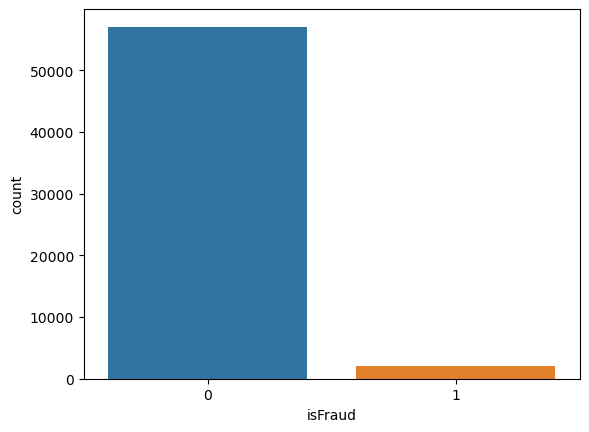

In [8]:
sns.countplot(df.isFraud);

## checking and dealing with missing values

In [9]:
mis_count=df.isnull().sum().sort_values(ascending=False)
mis_perc=round(mis_count/len(df)*100,2)
mis_df=pd.concat([mis_count,mis_perc],axis=1,keys=["missing count","missing percentage"])
mis_df

,missing count,missing percentage
id_24,58567,99.18
id_25,58530,99.11
id_26,58529,99.11
id_21,58529,99.11
id_22,58529,99.11
...,...,...
C3,0,0.00
C2,0,0.00
C1,0,0.00
isFraud,0,0.00


In [10]:
mis_df[mis_df["missing count"]!=0]

,missing count,missing percentage
id_24,58567,99.18
id_25,58530,99.11
id_26,58529,99.11
id_21,58529,99.11
id_22,58529,99.11
...,...,...
V316,3,0.01
V317,3,0.01
V318,3,0.01
V319,3,0.01


### we will delete those columns where missing percentage > 20%

In [11]:
data=df.copy()
data=data[df.columns[df.isnull().mean()<0.2]]
data

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,234.000000,0.000000,225.500000,0.000000,288.000000,1707.000000,1707.000000,0.0,0.0,0.0
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,0.000000,0.000000,73.772797,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,0.000000,0.000000,99.900002,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59049,3549150,0,14898396,335.000,W,2616,327.0,150.0,discover,102.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
59050,3497600,0,13371647,20.950,W,3277,111.0,150.0,visa,226.0,...,47.950001,47.950001,138.850006,47.950001,0.000000,0.000000,0.000000,0.0,0.0,0.0
59051,3575755,0,15775109,59.000,W,9486,127.0,150.0,mastercard,224.0,...,0.000000,49.000000,49.000000,49.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
59052,3521246,0,14071016,25.950,W,2392,360.0,150.0,mastercard,126.0,...,25.950001,25.950001,25.950001,25.950001,51.900002,51.900002,51.900002,0.0,0.0,0.0


### Filling numerical features with mean

In [12]:
num_cols=data.select_dtypes(include=np.number).columns
num_cols

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=178)

In [13]:
data[num_cols]=data[num_cols].fillna(data[num_cols].mean())

In [14]:
data[num_cols].isnull().mean()

TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
card1             0.0
                 ... 
V317              0.0
V318              0.0
V319              0.0
V320              0.0
V321              0.0
Length: 178, dtype: float64

### Filling categorical features with mode

In [15]:
cat_cols=data.select_dtypes(include="object").columns
cat_cols

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain'], dtype='object')

In [16]:
data[cat_cols]=data[cat_cols].fillna(data[cat_cols].mode().iloc[0])

In [17]:
data[cat_cols].isnull().sum()

ProductCD        0
card4            0
card6            0
P_emaildomain    0
dtype: int64

## Creating dummies for categorical features

In [18]:
data=pd.get_dummies(data,columns=cat_cols)

In [19]:
data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,P_emaildomain_web.de,P_emaildomain_windstream.net,P_emaildomain_yahoo.co.jp,P_emaildomain_yahoo.co.uk,P_emaildomain_yahoo.com,P_emaildomain_yahoo.com.mx,P_emaildomain_yahoo.de,P_emaildomain_yahoo.es,P_emaildomain_yahoo.fr,P_emaildomain_ymail.com
0,2994681,0,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,...,0,0,0,0,1,0,0,0,0,0
1,3557242,0,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,...,0,0,0,0,0,0,0,0,0,0
2,3327470,0,8378575,73.773,12778,500.0,185.0,224.0,284.0,60.0,...,0,0,0,0,0,0,0,0,0,0
3,3118781,0,2607840,400.000,12316,548.0,150.0,195.0,441.0,87.0,...,0,0,0,0,0,0,0,0,0,0
4,3459772,0,12226544,31.950,9002,453.0,150.0,226.0,264.0,87.0,...,0,0,0,0,1,0,0,0,0,0


### separating input and output features

In [20]:
x=data.drop(columns=["isFraud"])
y=data.isFraud

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

## Dealing with imbalance data

In [22]:
y_train.value_counts()

0    39944
1     1393
Name: isFraud, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=25,sampling_strategy=1.0)

In [24]:
X_train,Y_train=sm.fit_resample(x_train,y_train)

In [25]:
Y_train.value_counts()

0    39944
1    39944
Name: isFraud, dtype: int64

## Using Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

#BaseLine Model
model=RandomForestClassifier()

In [27]:
model.fit(X_train,Y_train)
model.score(x_test,y_test)

0.9752215386352091

## Feature Selection

In [28]:
from sklearn.feature_selection import SelectKBest,f_classif
selector=SelectKBest(f_classif,k=10)

In [29]:
x_new=selector.fit_transform(x,y)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train_new,x_test_new,y_train_new,y_test_new=train_test_split(x_new,y,test_size=0.3,random_state=42)

In [32]:
model.fit(x_train_new,y_train_new)
model.score(x_test_new,y_test_new)

0.9687870406953774

In [33]:
#here our accuracy decreased by apprx. 0.7% but we are able to achieve it by only using 10 features instead of 250.Since our aim
#is not only to increase performance but also to decrease our computational cost.

## Cross Validation

In [34]:
from sklearn.model_selection import cross_validate
cv_results=cross_validate(model,x_new,y,cv=10,scoring=["accuracy","precision","recall"])
cv_results

{'fit_time': array([1.28764534, 1.56723762, 1.55197525, 1.34339404, 1.24970818,
        1.53240848, 1.56213212, 1.31214881, 1.20284343, 1.53085351]),
 'score_time': array([0.0543201 , 0.05585647, 0.06252623, 0.04685807, 0.04691744,
        0.06248474, 0.06253028, 0.06248331, 0.04690695, 0.06248236]),
 'test_accuracy': array([0.96884524, 0.96901456, 0.96918388, 0.96833728, 0.96765453,
        0.96900931, 0.96799323, 0.96850127, 0.96985605, 0.96900931]),
 'test_precision': array([0.79310345, 0.82142857, 0.77142857, 0.76923077, 0.63636364,
        0.75757576, 0.67741935, 0.70588235, 0.78947368, 0.82142857]),
 'test_recall': array([0.11442786, 0.11442786, 0.13432836, 0.09950249, 0.105     ,
        0.125     , 0.105     , 0.12      , 0.15      , 0.11442786])}

In [35]:
print("Accuracy: ", cv_results["test_accuracy"].mean())

Accuracy:  0.9687404677228025


## Hyper Parameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [37]:
criterion=["gini","entropy"]
n_estimators=[100,200,300]
max_features=["auto","sqrt","log2"]
max_depth=[10,20]
max_depth.append(None)

In [38]:
params={
    "criterion":criterion,
    "n_estimators":n_estimators,
    "max_features":max_features,
    "max_depth":max_depth
}
params.items()

dict_items([('criterion', ['gini', 'entropy']), ('n_estimators', [100, 200, 300]), ('max_features', ['auto', 'sqrt', 'log2']), ('max_depth', [10, 20, None])])

In [39]:
gs=GridSearchCV(rfc,param_grid=params,n_jobs=2)

In [40]:
gs.fit(x_train_new,y_train_new)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [41]:
gs.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 100}

In [42]:
gs.best_score_

0.9682367113924956

In [43]:
gs.score(x_test_new, y_test_new)

0.9685612688378393